# Problem Statement: 
Create a machine learning model which will help the company in determining the salary of new 
hired employees using the given data.

In [72]:
# Let's start by loading and inspecting the contents of the uploaded CSV file.
import pandas as pd

# Load the dataset
file_path = 'D:/ML case Study.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


College             City       Role  Previous CTC  \
0        SVNIT Surat          Asansol    Manager       55523.0   
1         NIT Bhopal            Ajmer  Executive       57081.0   
2       IEM, Kolkata  Rajpur Sonarpur  Executive       60347.0   
3  KIIT, Bhubaneswar            Ajmer  Executive       49010.0   
4                DTU         Durgapur  Executive       57879.0   

   Previous job change  Graduation Marks  EXP (Month)       CTC  
0                    3                66           19  71406.58  
1                    1                84           18  68005.87  
2                    2                52           28  76764.02  
3                    2                81           33  82092.39  
4                    4                74           32  73878.10

In [3]:
#check missing values
data.isna().sum()

College                0
City                   0
Role                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
dtype: int64

# Plotting boxplots for potential outliers

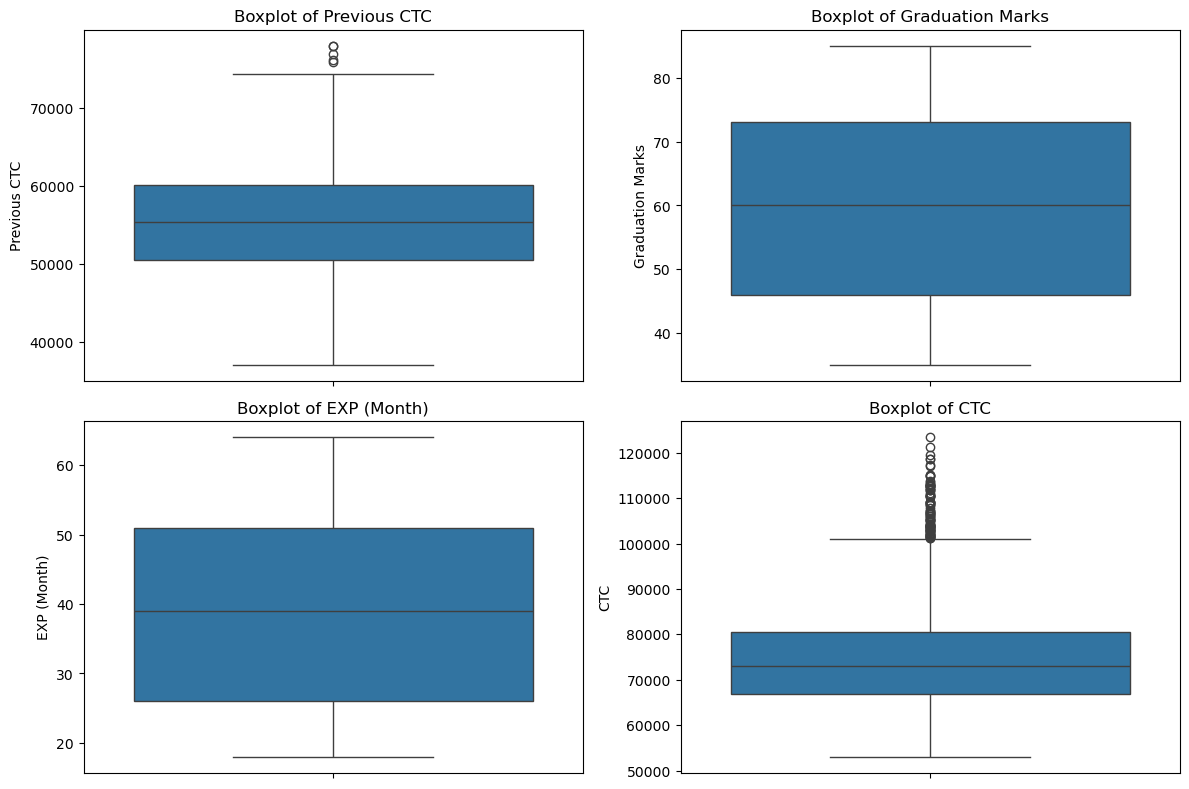

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting boxplots for potential outliers in numerical columns
numerical_cols = ['Previous CTC', 'Graduation Marks', 'EXP (Month)', 'CTC']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


# Rectifing outliers

In [7]:
# Outliers can be capped or removed; here we are capping extreme outliers
import numpy as np
for col in numerical_cols:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data[col] = np.clip(data[col], lower_bound, upper_bound)

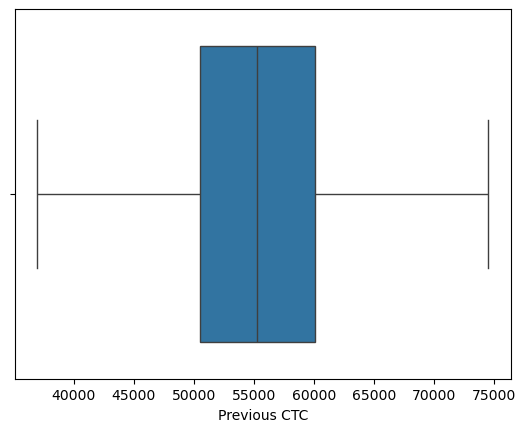

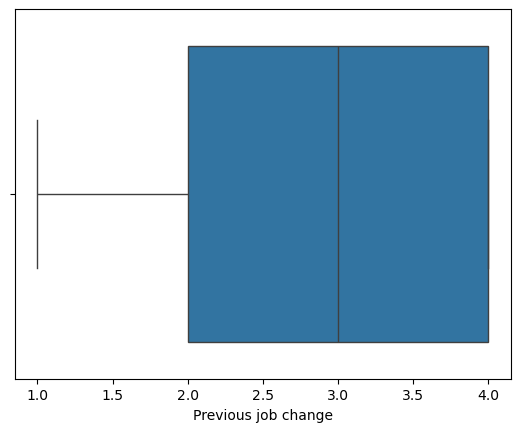

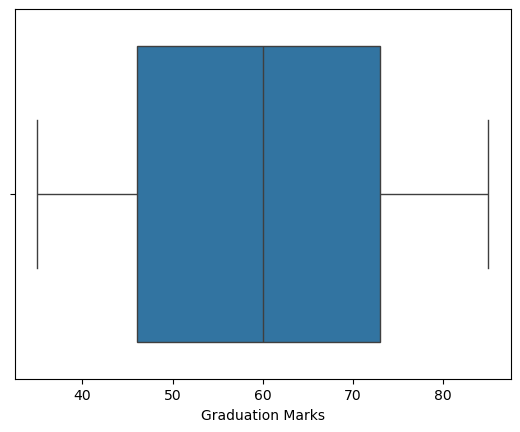

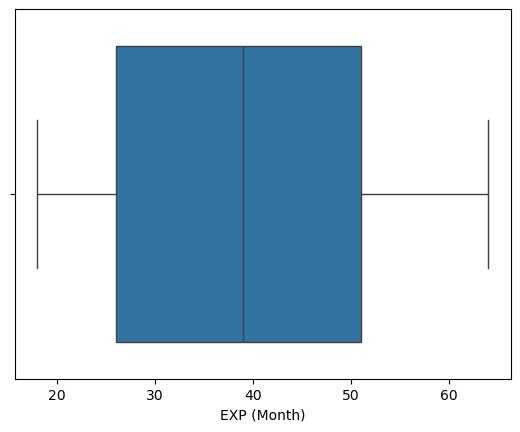

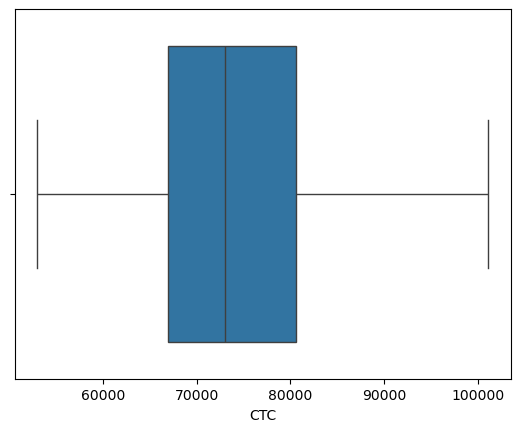

In [8]:
# Check for outliers again
for col in data.select_dtypes(include=np.number).columns:
    sns.boxplot(x=data[col])
    plt.show()

# Assigning tiers to the colleges

In [76]:
# Let's start by loading and inspecting the contents of the uploaded CSV file.
import pandas as pd

# Load the dataset
file_path = 'D:/Colleges.csv'
college = pd.read_csv(file_path)


In [78]:
college.head()

Tier 1          Tier 2                                      Tier 3
0     IIT Bombay  IIIT Bangalore  Ramaiah Institute of Technology, Bengaluru
1      IIT Delhi      IIIT Delhi                      TIET/Thapar University
2  IIT Kharagpur          IGDTUW                         Manipal Main Campus
3     IIT Madras     NIT Calicut                                 VIT Vellore
4     IIT Kanpur   IIITM Gwalior                             SRM Main Campus

In [80]:
Tier1= college["Tier 1"].tolist()
Tier2= college["Tier 2"].tolist()
Tier3= college["Tier 3"].tolist()

In [82]:
Tier3

['Ramaiah Institute of Technology, Bengaluru',
 'TIET/Thapar University',
 'Manipal Main Campus',
 'VIT Vellore',
 'SRM Main Campus',
 'KIIT, Bhubaneswar',
 'Amity University',
 'BMS College, Bangalore',
 'PES University, Bangalore',
 'USIT, Delhi',
 'MAIT, Delhi',
 'MSIT, Delhi',
 'Dayanand College of Engineering, Bangalore',
 'Heritage Institute of Technology, Kolkata',
 'IEM, Kolkata',
 'Techno India, Kolkata',
 'Jaypee, Noida',
 'Amrita University, Coimbatore',
 'Cummins College of Engineering for Women, Pune',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [84]:
# Convert City to numerical format
data['City'] = data['City'].astype('category').cat.codes

In [86]:
data.head()

College  City       Role  Previous CTC  Previous job change  \
0        SVNIT Surat     2    Manager       55523.0                    3   
1         NIT Bhopal     1  Executive       57081.0                    1   
2       IEM, Kolkata    12  Executive       60347.0                    2   
3  KIIT, Bhubaneswar     1  Executive       49010.0                    2   
4                DTU     6  Executive       57879.0                    4   

   Graduation Marks  EXP (Month)       CTC  
0                66           19  71406.58  
1                84           18  68005.87  
2                52           28  76764.02  
3                81           33  82092.39  
4                74           32  73878.10

# Creating Dummy variables for roles

In [89]:
# Convert Role to dummy variables
role_dummies = pd.get_dummies(data['Role'], prefix='Role')
data = pd.concat([data, role_dummies], axis=1)

In [91]:
data.head()

College  City       Role  Previous CTC  Previous job change  \
0        SVNIT Surat     2    Manager       55523.0                    3   
1         NIT Bhopal     1  Executive       57081.0                    1   
2       IEM, Kolkata    12  Executive       60347.0                    2   
3  KIIT, Bhubaneswar     1  Executive       49010.0                    2   
4                DTU     6  Executive       57879.0                    4   

   Graduation Marks  EXP (Month)       CTC  Role_Executive  Role_Manager  
0                66           19  71406.58           False          True  
1                84           18  68005.87            True         False  
2                52           28  76764.02            True         False  
3                81           33  82092.39            True         False  
4                74           32  73878.10            True         False

In [93]:
# Drop the original College and Role columns
data = data.drop(columns=['College', 'Role'])


In [17]:
data.head()

City  Previous CTC  Previous job change  Graduation Marks  EXP (Month)  \
0     2       55523.0                    3                66           19   
1     1       57081.0                    1                84           18   
2    12       60347.0                    2                52           28   
3     1       49010.0                    2                81           33   
4     6       57879.0                    4                74           32   

        CTC  College_Tier  Role_Executive  Role_Manager  
0  71406.58           1.0           False          True  
1  68005.87           1.0            True         False  
2  76764.02           2.0            True         False  
3  82092.39           2.0            True         False  
4  73878.10           1.0            True         False

# Correlation Matrix

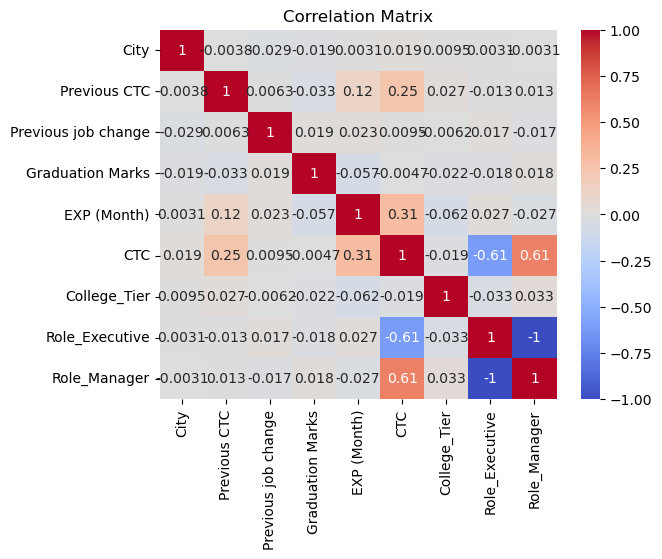

In [19]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a heatmap to visualize the correlations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [20]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 1589 non-null   int8   
 1   Previous CTC         1589 non-null   float64
 2   Previous job change  1589 non-null   int64  
 3   Graduation Marks     1589 non-null   int64  
 4   EXP (Month)          1589 non-null   int64  
 5   CTC                  1589 non-null   float64
 6   College_Tier         1589 non-null   float64
 7   Role_Executive       1589 non-null   bool   
 8   Role_Manager         1589 non-null   bool   
dtypes: bool(2), float64(3), int64(3), int8(1)
memory usage: 79.3 KB


#  Linear Regression

In [22]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Define the features and target variable
X = data.drop(columns=['CTC'])  # Features
y = data['CTC']  # Target

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")


Mean Absolute Error: 6822.465232949101
R2 Score: 0.575900691699388


# Ridge and Lasso Regression model

In [24]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


# Create a Ridge regression model
alpha = 1.0  # Regularization parameter (you can tune this)
model_ridge = Ridge(alpha=alpha)

# Train the model
model_ridge.fit(X_train, y_train)

# Predict the 'quality' on the training and test sets
y_pred_train = model_ridge.predict(X_train)
y_pred_test = model_ridge.predict(X_test)

# Calculate R-squared for the training and test sets
r_squared_train = r2_score(y_train, y_pred_train)
r_squared_test = r2_score(y_test, y_pred_test)

print(f"R-squared for training set: {r_squared_train}")
print(f"R-squared for test set: {r_squared_test}")

R-squared for training set: 0.5036047790289349
R-squared for test set: 0.5758300333150139


In [25]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# Create a Lasso regression model
alpha = 0.1  # Regularization parameter (you can tune this)
model_lasso = Lasso(alpha=alpha)

# Train the model
model_lasso.fit(X_train, y_train)

# Predict the 'quality' on the training and test sets
y_pred_train = model_lasso.predict(X_train)
y_pred_test = model_lasso.predict(X_test)

# Calculate R-squared for the training and test sets
r_squared_train = r2_score(y_train, y_pred_train)
r_squared_test = r2_score(y_test, y_pred_test)

print(f"R-squared for training set: {r_squared_train}")
print(f"R-squared for test set: {r_squared_test}")

R-squared for training set: 0.5036049112451337
R-squared for test set: 0.5758982394922876


# Decision Tree Regressor

In [27]:
from sklearn.tree import DecisionTreeRegressor
# Define the features and target variable
from sklearn.metrics import mean_absolute_error, r2_score
X = data.drop(columns=['CTC'])  # Features
y = data['CTC']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeRegressor
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Make predictions
y_pred = decision_tree_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

Mean Absolute Error: 7444.16248427673
R2 Score: 0.3472444119650011


# KNeighbors Regressor

In [29]:
from sklearn.neighbors import KNeighborsRegressor
# Define the features and target variable
X = data.drop(columns=['CTC'])  # Features
y = data['CTC']  # Target

# Normalize the data for KNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the KNeighborsRegressor
knn_model = KNeighborsRegressor()

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

Mean Absolute Error: 6866.006572327044
R2 Score: 0.5304554637112052


# Random Forest Regressor

In [31]:
from sklearn.ensemble import RandomForestRegressor
# Define the features and target variable
X = data.drop(columns=['CTC'])  # Features
y = data['CTC']  # Target

# Normalize the data for Random Forest
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

Mean Absolute Error: 6064.940823899367
R2 Score: 0.6115893255446503


# Gradient Boosting Regressor

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
# Normalize the data for Gradient Boosting
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the GradientBoostingRegressor
gbr_model = GradientBoostingRegressor(random_state=42)

# Train the model
gbr_model.fit(X_train, y_train)

# Make predictions
y_pred = gbr_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

Mean Absolute Error: 6233.711615878202
R2 Score: 0.6052030963020857


# XGB Regressor

In [35]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [36]:
from xgboost import XGBRegressor
# Define the features and target variable
X = data.drop(columns=['CTC'])  # Features
y = data['CTC']  # Target

# Normalize the data for XGBoost
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the XGBRegressor
xgb_model = XGBRegressor(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

Mean Absolute Error: 6220.322372248427
R2 Score: 0.5994792809334342


#  OLS regression

In [38]:
import statsmodels.api as sm

# Adding a constant (intercept) term to the input features for OLS
X_ols = sm.add_constant(X_train)

# Performing OLS (Ordinary Least Squares) regression
ols_model = sm.OLS(y_train, X_ols).fit()

# Getting a summary of the OLS regression results
ols_summary = ols_model.summary()
print(ols_summary)


                            OLS Regression Results                            
Dep. Variable:                    CTC   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     183.0
Date:                Sun, 13 Oct 2024   Prob (F-statistic):          4.51e-187
Time:                        13:48:11   Log-Likelihood:                -13217.
No. Observations:                1271   AIC:                         2.645e+04
Df Residuals:                    1263   BIC:                         2.649e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.501e+04    223.571    335.525      0.0

# Answers Related to the Project

1. Your views about the problem statement?
**ANS.** The problem statement presents a practical and real-world scenario involving salary prediction for new employees based on a variety of features. 
Objective: Build a predictive model to estimate the salary (CTC) of new hires.
Features: The dataset contains features such as:
College: Which likely relates to the reputation of the educational institution.
City: The location of the job or candidate.
Role: The job title or position.
Other factors that could influence salary, which might not be explicitly listed but assumed based on typical salary datasets (experience, education, etc.).

2. What will be your approach to solving this task?

**ANS.** Here is a step-by-step approach to solving the salary prediction task:

1. Understanding the Problem
2. Data Understanding and Exploration
3. Preprocess the data (handle missing values, convert categorical features).
4. Try different regression models and evaluate them using MAE and R² Scores.
5. Select the best model based on performance, and tune it to improve accuracy.
6. Provide insights into salary predictions and report the findings.

3. What were the available ML model options you had to perform this task?

**ANS.** 1. Linear Regression – for a simple baseline model.
2. Decision Tree Regressor – for capturing non-linear patterns.
3. Random Forest Regressor – for better accuracy and reduced overfitting.
4. Gradient Boosting Regressor – for high accuracy and handling complex patterns.
5. KNN Regressor – for a simple, distance-based prediction.
6. XGBoost Regressor – for optimized performance and speed.

4. Which model’s performance is best and what could be the possible reason for that?

**ANS.**
Random Forest Regressor has the lowest MAE (6064.94) and the highest R² Score (0.61), making it the best-performing model.
The Random Forest Regressor performs well due to its ensemble nature, ability to capture complex relationships, robustness against overfitting and noise, and flexibility with different types of data. These factors contribute to its reliability and effectiveness in making accurate predictions for salary estimation in your dataset.


5. What steps can you take to improve this selected model’s performance even further?

   **ANS.** We can enhance the performance of the Random Forest Regressor for salary prediction by focusing on hyperparameter tuning, feature engineering, and leveraging advanced modeling techniques are particularly effective ways to achieve improvements. Regularly validating and updating the model will also help maintain its predictive accuracy over time.